In [1]:
# References:
# https://pub.towardsai.net/how-to-do-effective-paraphrasing-using-huggingface-and-diverse-beam-search-t5-pegasus-229ca998d229
# 

from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

paraphraser = "tuner007/pegasus_paraphrase"

import warnings
warnings.filterwarnings("ignore")

def initParaphraser(model_name):
    torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)
    
    return torch_device,tokenizer,model

def generateParaphrases(sent,torch_device,tokenizer,model,temperature,beams,variations):    
    batch = tokenizer.prepare_seq2seq_batch(sent,truncation=True,padding='longest',max_length=60, return_tensors="pt").to(torch_device)
    translated = model.generate(**batch,max_length=60,num_beams=beams, num_return_sequences=variations, temperature=temperature, max_time = None, early_stopping = True)
    paral = tokenizer.batch_decode(translated, skip_special_tokens=True)

    return paral

torch_device,tokenizer,model = initParaphraser(paraphraser)

In [2]:
temperature = 1.5
beams = 10
variations = 5

sent = "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei"

paral = generateParaphrases(sent,torch_device,tokenizer,model,temperature,beams,variations)

for para in paral:
    print(para)

Direct transfer reactions can be used in the study of light exotic nuclei.
Direct transfer reactions can be used to study light exotic nuclei.
Direct transfer reactions have been used in the study of light exotic nuclei.
Direct transfer reactions are used in the study of light exotic nuclei.
Direct transfer reactions are useful in the study of light exotic nuclei.


***Measuring effectiveness of paraphrases***

Variability - Levenshtein Distance

Meaningfulness

Reference: https://arxiv.org/pdf/2205.13119.pdf - Understanding Metrics for Paraphrasing

https://lopezyse.medium.com/paraphrasing-in-natural-language-processing-nlp-857c28e68488

In [2]:
import Levenshtein
Levenshtein.distance('Direct transfer reactions are convenient to use.', "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei")

50

In [3]:
Levenshtein.seqratio('Direct transfer reactions are convenient to use.', "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei")

0.5416666666666666

In [5]:
len("Direct transfer reactions are convenient to use.".split())

7

In [4]:
import levenshteinDistance

In [5]:
levenshteinDistance.levenshteinDistance('Direct transfer reactions are used to study exotic nuclei.',
                                         "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei")

10.0

In [6]:
def ratio(string1, string2):
    lensum = max(len(string1), len(string2))
    ldist = levenshteinDistance.levenshteinDistance(string1, string2)
    return (lensum - ldist)/(lensum)

In [7]:
ratio('Direct transfer reactions are used to study exotic nuclei.',
     "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei")

0.8958333333333334

### Testing Variability of different models

In [8]:
import numpy as np

In [12]:
gpt4 = ['Direct transfer reactions have been confirmed as practical instruments for examining light exotic nuclei.',
'The investigation of light exotic nuclei has been facilitated by the proven utility of direct transfer reactions.',
'Direct transfer reactions have demonstrated their effectiveness as convenient means for the research of light exotic nuclei.',
'In the realm of light exotic nuclei study, direct transfer reactions have been affirmed as handy tools.',
'Direct transfer reactions have been validated as useful tools in the exploration of light exotic nuclei.']

In [17]:
dist = []
for sentence in gpt4:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[10.0, 15.0, 8.0, 17.0, 6.0]
11.2


In [18]:
dist = []
for sentence in gpt4:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[0.9047619047619048, 0.8672566371681416, 0.9354838709677419, 0.8349514563106796, 0.9423076923076923]
0.8969523123032321


In [19]:
gpt3_5 = ['Transfer reactions involving direct transfers have emerged as practical instruments for investigating the characteristics of less-common, lightweight atomic nuclei.',
'The application of direct transfer reactions has demonstrated their effectiveness as useful techniques for exploring the properties of light and unusual atomic nuclei.',
'The utilization of direct transfer reactions has been shown to be advantageous for the examination of light exotic nuclei, providing researchers with convenient tools for their study.',
'Investigating light exotic nuclei has been facilitated through the use of direct transfer reactions, which have been established as convenient methods for this purpose.',
'The study of light exotic nuclei has been greatly aided by the convenience and utility of direct transfer reactions, which serve as valuable tools in this field of research.']

# Calculate Levenshtein distance
dist = []
for sentence in gpt3_5:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for sentence in gpt3_5:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[16.0, 18.0, 20.0, 24.0, 27.0]
21.0
[0.9024390243902439, 0.8922155688622755, 0.8907103825136612, 0.8571428571428571, 0.8439306358381503]
0.8772876937494376


In [20]:
bing = ['The study of light exotic nuclei has been made easier by direct transfer reactions.',
'Direct transfer reactions have been found to be useful in the study of light exotic nuclei.',
'Direct transfer reactions are a convenient tool for studying light exotic nuclei.',
'The study of light exotic nuclei has been facilitated by direct transfer reactions.',
'Direct transfer reactions are useful tools for studying light exotic nuclei.']

# Calculate Levenshtein distance
dist = []
for sentence in bing:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for sentence in bing:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[16.0, 5.0, 10.0, 16.0, 10.0]
11.4
[0.8333333333333334, 0.9479166666666666, 0.8958333333333334, 0.8333333333333334, 0.8958333333333334]
0.88125


In [21]:
bard = ['Direct transfer reactions are a useful method for studying light exotic nuclei.',
'Direct transfer reactions have been used to gain valuable insights into light exotic nuclei.',
'Direct transfer reactions are a powerful tool for probing the structure of light exotic nuclei.',
'Direct transfer reactions can be used to measure the properties of light exotic nuclei.',
'Direct transfer reactions have provided a wealth of information about light exotic nuclei.']

# Calculate Levenshtein distance
dist = []
for sentence in bard:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for sentence in bard:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[11.0, 10.0, 9.0, 8.0, 10.0]
9.6
[0.8854166666666666, 0.8958333333333334, 0.90625, 0.9166666666666666, 0.8958333333333334]
0.9


In [22]:
pegasus = ['Direct transfer reactions can be used in the study of light exotic nuclei.',
'Direct transfer reactions can be used to study light exotic nuclei.',
'Direct transfer reactions have been used in the study of light exotic nuclei.',
'Direct transfer reactions are used in the study of light exotic nuclei.',
'Direct transfer reactions are useful in the study of light exotic nuclei.']

# Calculate Levenshtein distance
dist = []
for sentence in pegasus:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for sentence in pegasus:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[6.0, 9.0, 6.0, 7.0, 7.0]
7.0
[0.9375, 0.90625, 0.9375, 0.9270833333333334, 0.9270833333333334]
0.9270833333333334


In [23]:
parrot = ['Direct transfer reactions have proven to be useful tools in studying light exotic nuclei',
'Direct transfer reactions have been proven to be useful tools in the study of light exotic nuclei',
'Direct transfer reactions have proven to be practical tools in the study of light and exotic nuclei',
'Direct transfer reactions have proven to be useful tools in the study of light exotic nuclei',
'Direct transfer reactions have proven to be convenient tools for study of light exotic nuclei']

# Calculate Levenshtein distance
dist = []
for sentence in parrot:
    dist.append(levenshteinDistance.levenshteinDistance(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for sentence in parrot:
    dist.append(ratio(sentence, 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'))
print(dist)
print(np.mean(dist))

[5.0, 3.0, 3.0, 2.0, 3.0]
3.2
[0.9479166666666666, 0.9690721649484536, 0.9696969696969697, 0.9791666666666666, 0.96875]
0.9669204935957513


***Testing Parrot's model with knobs***

Augmented thresholds for controlling output variations

References: 
https://github.com/PrithivirajDamodaran/Parrot_Paraphraser

https://huggingface.co/prithivida/parrot_paraphraser_on_T5


In [2]:
from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Only Init Once
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5", use_gpu=False)

In [4]:
phrase = "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei"

In [6]:
for i in range(5):
    para_phrases = parrot.augment(input_phrase=phrase, 
                                diversity_ranker="levenshtein", #levenshtein distance
                                do_diverse=False, 
                                max_return_phrases = 10, 
                                max_length=32, 
                                adequacy_threshold = 0.50, 
                                fluency_threshold = 0.5)
for para in para_phrases:
    print(para)

('direct transfer reactions have proven to be useful tools in studying light exotic nuclei', 28)
('direct transfer reactions have been proven to be useful tools in the study of light exotic nuclei', 26)
('direct transfer reactions have proven to be practical tools in the study of light and exotic nuclei', 25)
('direct transfer reactions have proven to be useful tools in the study of light exotic nuclei', 21)
('direct transfer reactions have proven to be convenient tools for study of light exotic nuclei', 18)
('direct transfer reactions have proved to be convenient tools in the study of light exotic nuclei', 13)
('direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei', 12)


https://machinelearningmastery.com/calculate-bleu-score-for-text-python/#:~:text=The%20Bilingual%20Evaluation%20Understudy%20Score,in%20a%20score%20of%200.0.

In [5]:
from nltk.translate.bleu_score import sentence_bleu


In [26]:
phrase = "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei"
reference = [phrase.split()]
candidate = "Direct transfer reactions are convenient to use".split()
score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(score)

0.1974664618782603


In [27]:
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

Cumulative 1-gram: 0.197466
Cumulative 2-gram: 0.134895
Cumulative 3-gram: 0.101225
Cumulative 4-gram: 0.000000


In [15]:
import numpy as np

In [ ]:
import os
import openai
openai.organization = "Insert Org" # Put in your own organization
openai.api_key = "Insert Key" # Put in your own key
openai.Model.list()

In [29]:
len("Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei")/4


24.0

In [ ]:
from bardapi import Bard

token = 'Insert Token' # Put in your own token
bard = Bard(token=token)
bard.get_answer("Give me 5 paraphrases of 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'")['content']

In [1]:
import json
import asyncio

In [2]:
from EdgeGPT import Query, Cookie, Chatbot, ConversationStyle

In [3]:
cookies = json.loads(open("./bing_cookies_default.json", encoding="utf-8").read())
bot = await Chatbot.create(cookies=cookies)

In [ ]:
Cookie.current_filepath
Cookie.import_data()

In [ ]:
try:
    loop = asyncio.get_running_loop()
except RuntimeError:  # 'RuntimeError: There is no current event loop...'
    loop = None

if loop and loop.is_running():
    print('Async event loop already running. Adding coroutine to the event loop.')
    tsk = loop.create_task(main())
    # ^-- https://docs.python.org/3/library/asyncio-task.html#task-object
    # Optionally, a callback function can be executed when the coroutine completes
    tsk.add_done_callback(
        lambda t: print(f'Task done with result={t.result()}  << return val of main()'))
else:
    print('Starting new event loop')
    result = asyncio.run(main())

In [7]:
async def main():
    bot = await Chatbot.create() # Passing cookies is optional
    print(await bot.ask(prompt="Hello world", conversation_style=ConversationStyle.creative))
    await bot.close()

# if __name__ == "__main__":
#     asyncio.run(main())

In [ ]:
q = Query("Give me 5 paraphrases of 'Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei'")
print(q)

# Semantic similarity

In [ ]:
from sentence_transformers import SentenceTransformer

# We first load our model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the original sentence and the paraphrases
original_sentence = "Direct transfer reactions have proven to be convenient tools in the study of light exotic nuclei"

In [24]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + gpt4)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(gpt4):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.92882776, 0.9068075, 0.94575, 0.8993396, 0.9049583] 0.91713667


In [25]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + gpt3_5)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(gpt3_5):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.8062577, 0.9187103, 0.8422706, 0.888905, 0.8485297] 0.8609346


In [26]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + bing)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(bing):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.9367213, 0.8976352, 0.9552614, 0.91223234, 0.94375896] 0.92912185


In [27]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + bard)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(bard):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.9613517, 0.94911426, 0.91136706, 0.9378634, 0.9039205] 0.9327234


In [28]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + pegasus)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(pegasus):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.5547579, 0.8508857, 0.5792154, 0.5628432, 0.59112465] 0.62776536


In [29]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode([original_sentence] + parrot)

# The original sentence is the first one
original_embedding = embeddings[0]

similarity = []
for i, paraphrase in enumerate(parrot):
    paraphrase_embedding = embeddings[i + 1]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[1.0, 0.9639585, 0.99413294, 0.95298755, 0.9861748] 0.9794508


# Testing on sentences with keywords

### Keyword: superdeformed bands

In [9]:
sentences = ["Bengtsson et al. have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as a function of frequency is related to which high-N orbitals are occupied.",
"In addition, the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are markedly different from those observed in 148,149Gd and 151,152Dy.",
"Each transition was in coincidence with the other members of the band and the spectra in fig. 1 are sums of spectra in coincidence with transitions in the superdeformed bands of 150Gd and 151Tb respectively.",
"Although no discrete transitions were found to link the superdeformed bands to known yrast states, it was possible, in the case of 150Gd to obtain a value for the average entry spin to the yrast states. This was established by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions.",
"On the assumption that the superdeformed band does not become yrast until above spin 50 h then, due to its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast."
]

### Generating paraphrases

#### Either use the API access or directly use the website

In [10]:
gpt4 = ["The l2 moments of inertia for multiple superdeformed bands have been computed by Bengtsson and his team, and they've demonstrated that the fluctuation in the total l2 value in relation to frequency depends on the occupation of high-N orbitals.",
"Moreover, the de-excitation rates from the superdeformed bands in 150Gd and 151Tb noticeably diverge from those found in 148,149Gd and 151,152Dy.",
"Every transition coincided with other elements of the band and the spectra displayed in figure 1 are the aggregates of spectra correlating with transitions in the superdeformed bands of 150Gd and 151Tb.",
"While no distinct transitions linking the superdeformed bands to known yrast states were identified, it was feasible to ascertain an average entry spin to the yrast states value for 150Gd. This was determined by gauging the intensity of the superdeformed band derived from spectra triggered by recognized yrast transitions."
"Assuming the superdeformed band doesn't become yrast until it exceeds a spin of 50 h, it's projected, due to its substantial moment of inertia, to de-excite at an excitation energy approximately 3 MeV above yrast."]

In [11]:
gpt4_compiled = [["The l2 moments of inertia for multiple superdeformed bands have been computed by Bengtsson and his team, and they've demonstrated that the fluctuation in the total l2 value in relation to frequency depends on the occupation of high-N orbitals.",
"Bengtsson and colleagues have determined the l2 moments of inertia for various superdeformed bands, illustrating that the change in total l2 value according to frequency correlates with the high-N orbitals that are filled.",
"Bengtsson et al. have assessed the l2 moments of inertia for several superdeformed bands and revealed that the variations in the overall l2 value, depending on frequency, is linked to the occupied high-N orbitals.",
"Bengtsson and others have figured out the l2 moments of inertia for multiple superdeformed bands and indicated that the total l2 value's fluctuation with frequency corresponds to the occupancy of high-N orbitals.",
"Several superdeformed bands' l2 moments of inertia have been computed by Bengtsson and his collaborators, showing that the change in the entire l2 value, relative to frequency, is tied to which high-N orbitals are engaged."],
["Moreover, the de-excitation rates from the superdeformed bands in 150Gd and 151Tb noticeably diverge from those found in 148,149Gd and 151,152Dy.",
"The superdeformed bands' de-excitation frequencies in 150Gd and 151Tb are notably distinct from those in 148,149Gd and 151,152Dy.",
"The de-excitation frequencies from the superdeformed bands in 150Gd and 151Tb contrast sharply with the observations in 148,149Gd and 151,152Dy.",
"Distinct from those in 148,149Gd and 151,152Dy, the de-excitation frequencies of the superdeformed bands in 150Gd and 151Tb are markedly different.",
"In 150Gd and 151Tb, the frequencies at which de-excitation occurs from the superdeformed bands differ significantly from the frequencies observed in 148,149Gd and 151,152Dy."],
["Every transition coincided with other elements of the band and the spectra displayed in figure 1 are the aggregates of spectra correlating with transitions in the superdeformed bands of 150Gd and 151Tb.",
"All transitions corresponded with other parts of the band, and the spectra in figure 1 represent combined spectra in synchrony with transitions in 150Gd and 151Tb's superdeformed bands.",
"Every transition was found to coincide with other band members, and figure 1's spectra are aggregate sums of spectra that were in conjunction with transitions in 150Gd and 151Tb's superdeformed bands.",
"Each of the transitions was simultaneous with the other band members, and the spectra in figure 1 consist of the total spectra coinciding with 150Gd and 151Tb's superdeformed bands' transitions.",
"Each transition matched with other components of the band, and the spectra in figure 1 are collective sums of spectra that coincide with transitions in the superdeformed bands of 150Gd and 151Tb."],
["While no distinct transitions linking the superdeformed bands to known yrast states were identified, it was feasible to ascertain an average entry spin to the yrast states value for 150Gd. This was determined by gauging the intensity of the superdeformed band derived from spectra triggered by recognized yrast transitions.",
"Even though no specific transitions were discovered to connect the superdeformed bands to acknowledged yrast states, for 150Gd, an average entry spin to the yrast states value could be derived. This discovery was made by evaluating the superdeformed band's intensity from spectra related to known yrast transitions.",
"Although connections between the superdeformed bands and known yrast states through discrete transitions were not found, it was achievable to obtain an average entry spin value for 150Gd's yrast states, gauged by the superdeformed band's intensity associated with known yrast transitions.",
"While no separate transitions were detected that would link superdeformed bands to known yrast states, in the case of 150Gd, it was feasible to figure out an average entry spin to the yrast states, determined by the superdeformed band's intensity monitored through known yrast transitions.",
"No individual transitions were located that could connect the superdeformed bands to known yrast states, but it was feasible, in 150Gd's case, to ascertain an average entry spin to the yrast states. This was determined by assessing the intensity of the superdeformed band resulting from spectra focused on known yrast transitions."],
["Assuming the superdeformed band doesn't become yrast until it exceeds a spin of 50 h, it's projected, due to its substantial moment of inertia, to de-excite at an excitation energy approximately 3 MeV above yrast.",
"If we presume that the superdeformed band won't reach yrast status until above a spin of 50 h, its large moment of inertia implies that it will likely de-excite around 3 MeV above yrast.",
"On the premise that the superdeformed band only becomes yrast after surpassing a 50 h spin, it's estimated to de-excite about 3 MeV above yrast due to its significant moment of inertia.",
"Assuming that the superdeformed band doesn't become yrast until beyond a spin of 50 h, it is expected to de-excite at an energy level roughly 3 MeV above yrast due to its extensive moment of inertia.",
"Based on the belief that the superdeformed band won't attain yrast status until a spin greater than 50 h, and due to its immense moment of inertia, it's anticipated to de-excite at an excitation level around 3 MeV higher than yrast."]]


In [12]:
gpt3_5 = ["Bengtsson et al. computed the l2 moments of inertia for various superdeformed bands and demonstrated that the fluctuation in the overall l2 value concerning frequency is connected to the occupancy of specific high-N orbitals.",
"Moreover, the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb differ significantly from those observed in 148,149Gd, and 151,152Dy.",
"Every transition coincided with other members of the band, and the spectra in figure 1 represent the combined spectra associated with transitions in the superdeformed bands of 150Gd and 151Tb, respectively.",
"Although no distinct transitions were identified to link the superdeformed bands to known yrast states, it was possible, in the case of 150Gd, to determine the average entry spin to the yrast states. This was achieved by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions.",
"Assuming that the superdeformed band does not become the yrast state until above spin 50 h, its large moment of inertia suggests that it will likely de-excite at an excitation energy approximately 3 MeV higher than the yrast state."]

In [13]:
gpt35_compiled = [["In their study, Bengtsson et al. computed the l2 moments of inertia for multiple superdeformed bands and observed a connection between the frequency-dependent total l2 value and the occupation of high-N orbitals.",
"Several superdeformed bands were analyzed by Bengtsson et al. to calculate the l2 moments of inertia. Their findings indicate a relationship between the total l2 value variation and the specific high-N orbitals that are filled.",
"The l2 moments of inertia for different superdeformed bands were determined in Bengtsson et al.'s research. They demonstrated that the changes in the total l2 value concerning frequency are associated with the occupancy of high-N orbitals.",
"In their study, Bengtsson and colleagues computed the l2 moments of inertia for various superdeformed bands. The results revealed a link between the fluctuations in the total l2 value based on frequency and the specific high-N orbitals being utilized.",
"By calculating the l2 moments of inertia for several superdeformed bands, Bengtsson et al. discovered a connection between the total l2 value variation and the high-N orbitals that are occupied as the frequency changes."],
["Additionally, the decay frequencies of the superdeformed bands in 150Gd and 151Tb show marked differences compared to the frequencies observed in 148,149Gd and 151,152Dy.",
"The decay frequencies of the superdeformed bands in 150Gd and 151Tb exhibit notable distinctions when compared to the frequencies observed in 148,149Gd and 151,152Dy.",
"Furthermore, the frequencies of decay from the superdeformed bands in 150Gd and 151Tb are considerably dissimilar from those observed in 148,149Gd and 151,152Dy.",
"In addition, the decay frequencies originating from the superdeformed bands in 150Gd and 151Tb stand out as markedly different from the frequencies observed in 148,149Gd and 151,152Dy.",
"Also, it is worth noting that the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb show distinct differences when compared to the observations in 148,149Gd and 151,152Dy."],
["Every transition in the superdeformed bands coincided with the other members of the band. The spectra shown in figure 1 represent the combined spectra coinciding with transitions in the superdeformed bands of 150Gd and 151Tb.",
"All transitions were in synchronization with the other members of the band, and the spectra displayed in figure 1 are the collective spectra corresponding to transitions in the superdeformed bands of 150Gd and 151Tb.",
"Each transition was observed to be in coincidence with the other members of the band. In figure 1, the spectra are obtained by combining the spectra corresponding to transitions in the superdeformed bands of 150Gd and 151Tb.",
"Every individual transition aligned with the other band members, and the spectra visualized in figure 1 comprise the total spectra coinciding with transitions in the superdeformed bands of 150Gd and 151Tb, respectively.",
"In figure 1, the spectra represent the combined results of transitions in the superdeformed bands of 150Gd and 151Tb, with each transition aligning with the other members of the band."],
["Despite the absence of specific transitions linking the superdeformed bands to established yrast states, the study managed to calculate the average entry spin for the yrast states of 150Gd. This calculation was based on measuring the intensity of the superdeformed band using spectra gated on known yrast transitions.",
"Although no direct connections were discovered between the superdeformed bands and recognized yrast states, the researchers successfully determined the average entry spin for the yrast states in the case of 150Gd. This determination was made possible by measuring the intensity of the superdeformed band through spectra gated on known yrast transitions.",
"While discrete transitions between the superdeformed bands and established yrast states were not detected, the study managed to derive the average entry spin for the yrast states of 150Gd. The calculation relied on measuring the intensity of the superdeformed band through spectra gated on known yrast transitions.",
"Although no specific transitions were identified as connections between the superdeformed bands and established yrast states, the study successfully obtained the average entry spin for the yrast states in the case of 150Gd. This calculation involved measuring the intensity of the superdeformed band using spectra gated on known yrast transitions.",
"Despite the absence of discrete connections linking the superdeformed bands to known yrast states, the study managed to calculate the average entry spin for the yrast states of 150Gd. This was accomplished by measuring the intensity of the superdeformed band through spectra gated on known yrast transitions."],
["Under the assumption that the superdeformed band becomes yrast only above spin 50 h, it is predicted to de-excite at an excitation energy of approximately 3 MeV above the yrast state, primarily due to its significant moment of inertia.",
"If we assume that the superdeformed band attains the status of being yrast beyond spin 50 h, then it is expected to undergo de-excitation at an excitation energy of roughly 3 MeV above the yrast state, mainly because of its considerable moment of inertia.",
"Given the assumption that the superdeformed band does not become yrast until reaching a spin value of 50 h, it is projected to de-excite when the excitation energy is approximately 3 MeV above the yrast state, largely due to its substantial moment of inertia.",
"Based on the assumption that the superdeformed band only becomes yrast after surpassing a spin value of 50 h, it is expected to de-excite at an excitation energy of approximately 3 MeV above the yrast state, primarily due to its large moment of inertia.",
"If we assume that the superdeformed band achieves the status of being yrast beyond a spin value of 50 h, it is estimated to de-excite at an excitation energy of roughly 3 MeV above the yrast state due to its significant moment of inertia."]]


In [14]:
bing = ["Bengtsson et al. calculated the l2 moments of inertia for several superdeformed bands and showed that the variation in the total l2 value as a function of frequency is related to which high-N orbitals are occupied.",
"The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are different from those observed in 148,149Gd and 151,152Dy.",
"Each transition was in coincidence with the other members of the band and the spectra in fig. 1 are sums of spectra in coincidence with transitions in the superdeformed bands of 150Gd and 151Tb respectively.",
"Although no discrete transitions were found to link the superdeformed bands to known yrast states, it was possible to obtain a value for the average entry spin to the yrast states in the case of 150Gd by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions.",
"Assuming that the superdeformed band does not become yrast until above spin 50 h then, due to its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast."
]

In [15]:
bing_compiled = [["The l2 moments of inertia for various superdeformed bands were computed by Bengtsson et al. and they demonstrated that the change in the total l2 amount with frequency depends on which high-N orbitals are filled.",
"By calculating the l2 moments of inertia of several superdeformed bands, Bengtsson et al. showed that the total l2 value varies with frequency according to the occupation of high-N orbitals.",
"Bengtsson et al. calculated the l2 moments of inertia for different superdeformed bands and found that the occupation of high-N orbitals affects the variation of the total l2 value as a function of frequency.",
"The variation in the total l2 value with frequency is influenced by which high-N orbitals are occupied, as shown by Bengtsson et al. who calculated the l2 moments of inertia for several superdeformed bands.",
"Which high-N orbitals are occupied determines the variation in the total l2 value with frequency, as demonstrated by Bengtsson et al. who computed the l2 moments of inertia for various superdeformed bands."],
["The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb differ significantly from those seen in 148,149Gd and 151,152Dy.",
"There is a marked difference in the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb compared to those observed in 148,149Gd and 151,152Dy.",
"The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are not the same as those observed in 148,149Gd and 151,152Dy, they are much different.",
"Compared to those seen in 148,149Gd and 151,152Dy, the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are very different.",
"The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb vary considerably from those observed in 148,149Gd and 151,152Dy."],
["All transitions were coincident with the other members of the band and the spectra in fig. 1 are sums of spectra coincident with transitions in the superdeformed bands of 150Gd and 151Tb respectively.",
"The spectra in fig. 1 are sums of spectra coincident with transitions in the superdeformed bands of 150Gd and 151Tb respectively, and all transitions were coincident with the other members of the band.",
"Each transition coincided with the other members of the band and the spectra in fig. 1 are sums of spectra that coincide with transitions in the superdeformed bands of 150Gd and 151Tb respectively.",
"The spectra in fig. 1 are sums of spectra that coincide with transitions in the superdeformed bands of 150Gd and 151Tb respectively, and each transition coincided with the other members of the band.",
"All transitions coincided with the other members of the band and the spectra in fig. 1 are the result of adding spectra that coincide with transitions in the superdeformed bands of 150Gd and 151Tb respectively."],
["No discrete transitions were found to connect the superdeformed bands to known yrast states, but it was possible to get a value for the average entry spin to the yrast states for 150Gd. This was done by measuring the intensity of the superdeformed band from spectra gated on known yrast transitions.",
"It was possible to measure the intensity of the superdeformed band from spectra gated on known yrast transitions and get a value for the average entry spin to the yrast states for 150Gd, even though no discrete transitions were found to link the superdeformed bands to known yrast states.",
"By measuring the intensity of the superdeformed band from spectra gated on known yrast transitions, a value for the average entry spin to the yrast states for 150Gd was obtained, even though no discrete transitions were found to connect the superdeformed bands to known yrast states.",
"Even though no discrete transitions were found to link the superdeformed bands to known yrast states, a value for the average entry spin to the yrast states for 150Gd was obtained by measuring the intensity of the superdeformed band from spectra gated on known yrast transitions.",
"A value for the average entry spin to the yrast states for 150Gd was obtained by measuring the intensity of the superdeformed band from spectra gated on known yrast transitions, even though no discrete transitions were found to connect the superdeformed bands to known yrast states."],
["Assuming that the superdeformed band does not become yrast until above spin 50 h then, because of its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast.",
"Because of its large moment of inertia, it is estimated that the superdeformed band does not de-excite until an excitation energy of around 3 MeV above yrast, assuming that it does not become yrast until above spin 50 h.",
"It is estimated that, because of its large moment of inertia, the superdeformed band de-excites at an excitation energy of around 3 MeV above yrast, assuming that it does not become yrast until above spin 50 h.",
"Assuming that it does not become yrast until above spin 50 h, it is estimated that, because of its large moment of inertia, the superdeformed band de-excites at an excitation energy of around 3 MeV above yrast.",
"It is estimated that the superdeformed band de-excites at an excitation energy of around 3 MeV above yrast, because of its large moment of inertia, assuming that it does not become yrast until above spin 50 h."]]


In [16]:
bard = ["Bengtsson et al. have found that the way the total l2 value changes as a function of frequency depends on which high-N orbitals are occupied.", 
"The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are significantly different from those observed in 148,149Gd and 151,152Dy.",
"Each transition was accompanied by other transitions in the same band, and the spectra in Figure 1 are sums of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb.",
"Although no discrete transitions were found that connect the superdeformed bands to known yrast states, it was possible to obtain a value for the average entry spin to the yrast states in the case of 150Gd. This was done by measuring the intensity of the superdeformed band in spectra that were triggered by known yrast transitions.",
"If we assume that the superdeformed band does not become yrast until a spin of 50 h, then, due to its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast."
]

In [17]:
bard_compiled = [["Bengtsson et al. have found that the way the total l2 value changes as a function of frequency depends on which high-N orbitals are occupied",
"Bengtsson et al. have demonstrated that the relationship between the total l2 value and frequency is influenced by the high-N orbitals that are occupied.",
"Bengtsson et al. have established that the variation in the total l2 value as a function of frequency is a consequence of the high-N orbitals that are occupied.",
"Bengtsson et al. have concluded that the total l2 value is related to the high-N orbitals that are occupied, and that this relationship changes as a function of frequency.",
"Bengtsson et al. have reported that the total l2 value is dependent on the high-N orbitals that are occupied, and that this dependency changes as a function of frequency."],
["The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are significantly different from those observed in 148,149Gd and 151,152Dy.",
"The de-excitation frequencies of the superdeformed bands in 150Gd and 151Tb are noticeably different from those observed in 148,149Gd and 151,152Dy.",
"The frequencies at which the superdeformed bands in 150Gd and 151Tb de-excite are markedly distinct from those observed in 148,149Gd and 151,152Dy.",
"The superdeformed bands in 150Gd and 151Tb de-excite at frequencies that are significantly different from those observed in 148,149Gd and 151,152Dy.",
"The de-excitation frequencies of the superdeformed bands in 150Gd and 151Tb are noticeably distinct from those observed in 148,149Gd and 151,152Dy, in addition to this."],
["Each transition was accompanied by other transitions in the same band, and the spectra in Figure 1 are sums of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb.",
"Every transition was accompanied by other transitions in the same band, and the spectra in Figure 1 are the sum of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb.",
"The spectra in Figure 1 are the sum of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb, and each transition was accompanied by other transitions in the same band.",
"The spectra in Figure 1 are the sum of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb, and this is in addition to the fact that each transition was accompanied by other transitions in the same band.",
"The spectra in Figure 1 are the sum of spectra that were triggered by transitions in the superdeformed bands of 150Gd and 151Tb, and each transition was accompanied by other transitions in the same band."],
["Although no discrete transitions were found that connect the superdeformed bands to known yrast states, it was still possible, in the case of 150Gd, to obtain a value for the average entry spin to the yrast states.",
"Even though no discrete transitions were found to connect the superdeformed bands to known yrast states, it was still possible, in the case of 150Gd, to obtain a value for the average entry spin to the yrast states.",
"The absence of discrete transitions that connect the superdeformed bands to known yrast states did not prevent the determination of the average entry spin to the yrast states in the case of 150Gd.",
"Despite the lack of discrete transitions that connect the superdeformed bands to known yrast states, it was still possible to obtain a value for the average entry spin to the yrast states in the case of 150Gd.",
"The fact that no discrete transitions were found to connect the superdeformed bands to known yrast states did not preclude the determination of the average entry spin to the yrast states in the case of 150Gd."],
["If we assume that the superdeformed band does not become yrast until a spin of 50 h, then, due to its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast.",
"Assuming that the superdeformed band does not become yrast until a spin of 50 h, and given its large moment of inertia, it is estimated to de-excite at an excitation energy of around 3 MeV above yrast.",
"We can estimate that the superdeformed band will de-excite at an excitation energy of around 3 MeV above yrast, if we assume that it does not become yrast until a spin of 50 h, and given its large moment of inertia.",
"The superdeformed band is estimated to de-excite at an excitation energy of around 3 MeV above yrast, based on the assumption that it does not become yrast until a spin of 50 h, and its large moment of inertia.",
"The superdeformed band is estimated to de-excite at an excitation energy of around 3 MeV above yrast, which is based on the assumption that it does not become yrast until a spin of 50 h, and its large moment of inertia."]]


In [18]:
# References:
# https://pub.towardsai.net/how-to-do-effective-paraphrasing-using-huggingface-and-diverse-beam-search-t5-pegasus-229ca998d229
# 

from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

paraphraser = "tuner007/pegasus_paraphrase"

import warnings
warnings.filterwarnings("ignore")

def initParaphraser(model_name):
    torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)
    
    return torch_device,tokenizer,model

def generateParaphrases(sent,torch_device,tokenizer,model,temperature,beams,variations):    
    batch = tokenizer.prepare_seq2seq_batch(sent,truncation=True,padding='longest',max_length=60, return_tensors="pt").to(torch_device)
    translated = model.generate(**batch,max_length=60,num_beams=beams, num_return_sequences=variations, temperature=temperature, max_time = None, early_stopping = True)
    paral = tokenizer.batch_decode(translated, skip_special_tokens=True)

    return paral

torch_device,tokenizer,model = initParaphraser(paraphraser)
temperature = 1.5
beams = 10
variations = 5

for sent in sentences:
    paral = generateParaphrases(sent,torch_device,tokenizer,model,temperature,beams,variations)
    print(paral)

['The variation in the total l2 value is related to which high-N orbitals are occupied, as shown by the calculation of the l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value as a function of Frequency is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value as a function of frequency is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value is related to which high-N orbitals are occupied, as shown by the calculation of the l2 moments of inertia for several superde formed bands.', 'The variation in the total l2 value as a function of frequencies is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.']
['The frequencies of de-excitation from the 

In [19]:
pegasus = ['The variation in the total l2 value is related to which high-N orbitals are occupied, as shown by the calculation of the l2 moments of inertia for several superdeformed bands.',
'The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are different.',
'The transitions in the superdeformed bands of 150Gd and 151Tb were in correlation with the other members of the band.',
'It was possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed.',
'Due to its large moment of inertia, the band is estimated to de-excite at an energy of around 3 MeV above yrast.']

In [20]:
pegasus_compiled = [['The variation in the total l2 value is related to which high-N orbitals are occupied, as shown by the calculation of the l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value as a function of Frequency is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value as a function of frequency is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.', 'The variation in the total l2 value is related to which high-N orbitals are occupied, as shown by the calculation of the l2 moments of inertia for several superde formed bands.', 'The variation in the total l2 value as a function of frequencies is related to which high-N orbitals are occupied, as shown by the calculated l2 moments of inertia for several superdeformed bands.'],
['The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are different.', 'The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are different from those in the other bands.', 'The frequencies of de-excitation from the superdeformed bands are different.', 'The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are vastly different from those in the other bands.', 'The frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb are different from those observed in the other bands.'],
['The transitions in the superdeformed bands of 150Gd and 151Tb were in correlation with the other members of the band.', 'The transitions in the superdeformed bands of 150Gd and 151Tb were in close proximity to the other members of the band.', 'The transitions in the superdeformed bands of 150Gd and 151Tb were related to the other members of the band.', 'The transitions in the superdeformed bands of 150Gd and 151Tb were in coincidence with the other members of the band.', 'The transitions in the superdeformed bands of 150Gd and 151Tb were in close correlation with the other members of the band.'],
['It was possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed.', 'It was possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed bands.', 'It is possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed.', 'It was possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superde formed bands.', 'It is possible to get a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed bands.'],
['Due to its large moment of inertia, the band is estimated to de-excite at an energy of around 3 MeV above yrast.', 'Due to its large moment of inertia, the band is estimated to de-excite at an energy of 3 MeV above yrast.', 'Due to its large moment of inertia, the superdeformed band is estimated to de-excite at an energy of around 3 MeV above yrast.', 'Due to the large moment of inertia, the band is estimated to de-excite at an energy of around 3 MeV above yrast.', 'Due to its large moment of inertia, the superdeformed band is estimated to de-excite at an energy of 3 MeV above yrast.']]

In [21]:
from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")
# Only Init Once
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5", use_gpu=False)


In [22]:
for phrase in sentences:
    para_phrases = parrot.augment(input_phrase=phrase, 
                                diversity_ranker="levenshtein", #levenshtein distance
                                do_diverse=True, 
                                max_return_phrases = 6,
                                adequacy_threshold = 0.50, 
                                fluency_threshold = 0.5
    )
    print(para_phrases)

[('for several superdeformed bands bengtsson et al have calculated the l2 moments of inertia they have shown that the variation in the total l2 value as a function of the frequency is related', 104), ('for several superdeformed bands bengtsson et al have calculated the l2 moments of inertia they have shown that the variation in the total l2 value is related to which high-n orbitals are occupied', 89), ('for several superdeformed bands bengtsson et al have calculated the l2 moments of inertia they have shown that the variation in the total l2 value as a function of the frequency is related to which the high-n orbit', 86), ('bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as a function of the frequency is related to which high-n orbitals are ', 26), ('bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 va

In [23]:
parrot = ['bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as a function of the frequency is related',
'the frequency of de-excitation from the superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy',
'the spectra of fig 1 are sums of spectra in coincidence with transitions in the superdeformed bands of 150gd and 151tb respectively',
'although no discrete transitions were found to link the superdeformed bands to known yrast states it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the',
'the superdeformed band is estimated to de-excite at an excitation energy of around 3 mev above yrast on the assumption that it does not become yrast until above spin 50 h']

In [24]:
parrot_compiled = [['as a function of frequency bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as', 'as a function of frequency bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as ', 'as a function of frequency bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as a', 'as a function of frequency bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as is', 'as a function of frequency bengtsson et al have calculated the l2 moments of inertia for several superdeformed bands and have shown that the variation in the total l2 value as a function of'],
['de-excitation frequencies from the superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy respectively', 'de-excitation from the superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy', 'de-excitation frequencies from superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy', 'de-excitation frequency from the superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy', 'de-excitation frequencies from the superdeformed bands in 150gd and 151tb are in addition markedly different from those observed in 148149gd and 151152dy'],
['spectra of fig 1 are sums of spectra in coincidence with transitions in the superdeformed bands 150gd and 151tb respectively each transition was in coincidence with the other members of', 'spectra of fig 1 are sums of spectra in coincidence with transitions in the superdeformed bands 150gd and 151tb respectively each transition was in coincidence with other members of the band', 'spectra of fig 1 are sums of spectra in coincidence with transitions in superdeformed bands 150gd and 151tb respectively each transition was in coincidence with the other members of the band', 'spectra of fig 1 are sums of spectra in coincidence with transitions in the superdeformed bands 150gd and 151tb respectively each transition was in coincidence', 'spectra are sums of spectra in coincidence with transitions in the superdeformed bands of 150gd and 151tb respectively'],
["however it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions", "however it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions", "however it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions", 'however it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions', 'however it was possible in the case of 150gd to obtain a value for the average entry spin to the yrast states by measuring the intensity of the superdeformed band obtained from spectra gated on known yrast transitions'],
["the superdeformed band is estimated to de-excite at an excitation energy of around 3 mev above yrast on the assumption that it does not become yrast until above spin 50 h", "the superdeformed band is estimated to de-excite at an excitation energy of around 3 mev above yrast on the assumption that it does not become yrast until above spin 50 h", 'the superdeformed band is estimated to de-excite at an excitation energy of around 3 mev above yrast on the assumption that it does not become yrast until above spin 50 h', 'the superdeformed band is estimated to de-excite at an excitation energy of around 3 mev above yrast on the assumption that it does not become yrast until above spin 50 h','on the assumption that the superdeformed band does not become yrast until above spin 50 h then due to its large moment of inertia it is estimated to de-excite at an excitation energy of around 3 mev above y']]

## Testing Variability (Levenshtein Distance & Levenshtein Ratio)

In [25]:
dist = []
for comp in zip(gpt4, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(gpt4, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[30.0, 9.0, 14.0, 65.0]
29.5
[0.8765432098765432, 0.9451219512195121, 0.9323671497584541, 0.878731343283582]
0.908190913534523


In [26]:
dist = []
for comp in zip(gpt3_5, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(gpt3_5, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[18.0, 6.0, 13.0, 8.0, 22.0]
13.4
[0.92, 0.9634146341463414, 0.9371980676328503, 0.9759036144578314, 0.9047619047619048]
0.9402556441997856


In [27]:
dist = []
for comp in zip(bing, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(bing, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[3.0, 4.0, 0.0, 12.0, 3.0]
4.4
[0.9865470852017937, 0.975609756097561, 1.0, 0.963855421686747, 0.9859154929577465]
0.9823855511887697


In [28]:
dist = []
for comp in zip(bard, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(bard, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[19.0, 4.0, 15.0, 21.0, 6.0]
13.0
[0.9147982062780269, 0.975609756097561, 0.927536231884058, 0.9367469879518072, 0.971830985915493]
0.9453044336253893


In [29]:
dist = []
for comp in zip(parrot, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(parrot, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[9.0, 9.0, 18.0, 18.0, 36.0]
18.0
[0.9596412556053812, 0.9451219512195121, 0.9130434782608695, 0.9457831325301205, 0.8309859154929577]
0.9189151466217682


In [30]:
dist = []
for comp in zip(pegasus, sentences):
    dist.append(levenshteinDistance.levenshteinDistance(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

# Calculate Levenshtein ratio
dist = []
for comp in zip(pegasus, sentences):
    dist.append(ratio(comp[0], comp[1]))
print(dist)
print(np.mean(dist))

[33.0, 12.0, 27.0, 37.0, 21.0]
26.0
[0.852017937219731, 0.926829268292683, 0.8695652173913043, 0.8885542168674698, 0.9014084507042254]
0.8876750180950828


## Testing Semantic Similarity

In [31]:
from sentence_transformers import SentenceTransformer

# We first load our model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [32]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + gpt4)

similarity = []
for i, paraphrase in enumerate(gpt4):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.96167064, 0.9549844, 0.9367014, 0.94444335] 0.9494499


In [33]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + gpt3_5)

similarity = []
for i, paraphrase in enumerate(gpt3_5):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.9551567, 0.9860072, 0.9488449, 0.98935956, 0.95792365] 0.9674584


In [34]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + bing)

similarity = []
for i, paraphrase in enumerate(bing):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.9951026, 0.98992366, 1.0, 0.98992777, 0.9914963] 0.9932901


In [35]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + bard)

similarity = []
for i, paraphrase in enumerate(bard):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.69667846, 0.9916469, 0.9522022, 0.9799916, 0.9937947] 0.9228628


In [36]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + parrot)

similarity = []
for i, paraphrase in enumerate(parrot):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.92108893, 0.97114235, 0.93094426, 0.9792753, 0.973048] 0.9550997


In [37]:
# We compute embeddings for the original sentence and the paraphrases
embeddings = model.encode(sentences + pegasus)

similarity = []
for i, paraphrase in enumerate(pegasus):
    original_embedding = embeddings[i]
    paraphrase_embedding = embeddings[i + 5]
    # Cosine similarity is a good measure for semantic similarity
    similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
print(similarity, np.mean(similarity))

[0.9419633, 0.9587518, 0.86004746, 0.823581, 0.7906892] 0.87500656


# Best of 5

## Levenshtein Distance and Ratio

In [58]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in gpt4_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in gpt4_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
gpt4_bo5_dist = bo5_dist

# For plotting
gpt4_dist = []
for i in range(5):
    dist = []
    for sentence in gpt4_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    gpt4_dist.append(dist) 
gpt4_var = np.var(gpt4_dist)
print(gpt4_dist)
print(gpt4_var)

[30.0, 18.0, 25.0, 39.0, 29.0]
28.2
[0.8765432098765432, 0.8902439024390244, 0.8792270531400966, 0.8825301204819277, 0.863849765258216]
0.8784788102391616
[[0.8765432098765432, 0.9103139013452914, 0.9237668161434978, 0.9013452914798207, 0.8923766816143498], [0.9451219512195121, 0.926829268292683, 0.9329268292682927, 0.8902439024390244, 0.9132947976878613], [0.9323671497584541, 0.9033816425120773, 0.8792270531400966, 0.8792270531400966, 0.9420289855072463], [0.9096385542168675, 0.8945783132530121, 0.8825301204819277, 0.9066265060240963, 0.9337349397590361], [0.9107981220657277, 0.8873239436619719, 0.8685446009389671, 0.863849765258216, 0.9137931034482759]]
0.0005150049406618916


In [59]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in gpt35_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in gpt35_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
gpt35_bo5_dist = bo5_dist

# For plotting
gpt35_dist = []
for i in range(5):
    dist = []
    for sentence in gpt35_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    gpt35_dist.append(dist)
    gpt35_var = np.var(gpt35_dist)
print(gpt35_dist)
print(gpt35_var)

[31.0, 14.0, 29.0, 30.0, 34.0]
27.6
[0.8634361233480177, 0.9216867469879518, 0.8599033816425121, 0.9096385542168675, 0.8666666666666667]
0.8842662945724029
[[0.8923766816143498, 0.8634361233480177, 0.8786610878661087, 0.896414342629482, 0.8834080717488789], [0.9294117647058824, 0.9216867469879518, 0.9695121951219512, 0.9565217391304348, 0.9292929292929293], [0.92, 0.9351851851851852, 0.9196428571428571, 0.9223744292237442, 0.8599033816425121], [0.9126506024096386, 0.9150141643059491, 0.9096385542168675, 0.9135446685878963, 0.9216867469879518], [0.8851063829787233, 0.8666666666666667, 0.888030888030888, 0.8774703557312253, 0.8697478991596639]]
0.0007906776461174379


In [60]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in bing_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in bing_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
bing_bo5_dist = bo5_dist

# For plotting
bing_dist = []
for i in range(5):
    dist = []
    for sentence in bing_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bing_dist.append(dist)
bing_var = np.var(bing_dist)
print(bing_dist)
print(bing_var)

[37.0, 17.0, 29.0, 48.0, 38.0]
33.8
[0.8340807174887892, 0.8963414634146342, 0.8599033816425121, 0.8554216867469879, 0.8262910798122066]
0.854407665821026
[[0.8878923766816144, 0.8878923766816144, 0.9103139013452914, 0.8340807174887892, 0.8385650224215246], [0.9573170731707317, 0.9401197604790419, 0.9285714285714286, 0.8963414634146342, 0.9634146341463414], [0.966183574879227, 0.8599033816425121, 0.9758454106280193, 0.8647342995169082, 0.9523809523809523], [0.9518072289156626, 0.8765060240963856, 0.8765060240963856, 0.9487951807228916, 0.8554216867469879], [0.9765258215962441, 0.8272727272727273, 0.8262910798122066, 0.9154929577464789, 0.8544600938967136]]
0.0024332227427579837


In [61]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in bard_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in bard_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
bard_bo5_dist = bo5_dist

# For plotting
bard_dist = []
for i in range(5):
    dist = []
    for sentence in bard_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bard_dist.append(dist)
    bard_var = np.var(bard_dist)
print(bard_dist)
print(bard_var)

[29.0, 13.0, 39.0, 37.0, 40.0]
31.6
[0.8699551569506726, 0.9207317073170732, 0.8375, 0.8885542168674698, 0.8169014084507042]
0.8667284979171839
[[0.9103139013452914, 0.8968609865470852, 0.9192825112107623, 0.8699551569506726, 0.8699551569506726], [0.975609756097561, 0.9634146341463414, 0.9512195121951219, 0.9207317073170732, 0.9285714285714286], [0.927536231884058, 0.9130434782608695, 0.8405797101449275, 0.8375, 0.8405797101449275], [0.9307228915662651, 0.927710843373494, 0.8885542168674698, 0.9036144578313253, 0.8975903614457831], [0.971830985915493, 0.9577464788732394, 0.827906976744186, 0.8169014084507042, 0.817351598173516]]
0.00228343729475223


In [72]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in pegasus_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in pegasus_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
pegasus_bo5_dist = bo5_dist

# For plotting
pegasus_dist = []
for i in range(5):
    dist = []
    for sentence in pegasus_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    pegasus_dist.append(dist)
    pegasus_var = np.var(pegasus_dist)
print(pegasus_dist)
print(pegasus_var)

[34.0, 16.0, 29.0, 38.0, 23.0]
28.0
[0.8475336322869955, 0.9024390243902439, 0.8599033816425121, 0.8855421686746988, 0.892018779342723]
0.8774873972674346
[[0.852017937219731, 0.8475336322869955, 0.852017937219731, 0.852017937219731, 0.8475336322869955], [0.926829268292683, 0.9512195121951219, 0.9024390243902439, 0.9512195121951219, 0.9573170731707317], [0.8695652173913043, 0.8647342995169082, 0.8599033816425121, 0.8743961352657005, 0.8695652173913043], [0.8885542168674698, 0.891566265060241, 0.8855421686746988, 0.8885542168674698, 0.8885542168674698], [0.9014084507042254, 0.8967136150234741, 0.8967136150234741, 0.8967136150234741, 0.892018779342723]]
0.0009724657135925968


In [63]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in parrot_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in parrot_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
parrot_bo5_dist = bo5_dist

# For plotting
parrot_dist = []
for i in range(5):
    dist = []
    for sentence in parrot_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    parrot_dist.append(dist)
    parrot_var = np.var(parrot_dist)
print(parrot_dist)
print(parrot_var)

[19.0, 12.0, 31.0, 22.0, 36.0]
24.0
[0.9147982062780269, 0.926829268292683, 0.8502415458937198, 0.9337349397590361, 0.8309859154929577]
0.8913179751432848
[[0.9147982062780269, 0.9147982062780269, 0.9192825112107623, 0.9192825112107623, 0.9282511210762332], [0.927710843373494, 0.9329268292682927, 0.926829268292683, 0.926829268292683, 0.9329268292682927], [0.855072463768116, 0.8502415458937198, 0.855072463768116, 0.8792270531400966, 0.9033816425120773], [0.9337349397590361, 0.9337349397590361, 0.9337349397590361, 0.9337349397590361, 0.9337349397590361], [0.8309859154929577, 0.8309859154929577, 0.8309859154929577, 0.8309859154929577, 0.9765258215962441]]
0.0017514075144219857


# Semantic Similarity

In [73]:
from sentence_transformers import SentenceTransformer

# We first load our model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [74]:
gpt4_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + gpt4_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    gpt4_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
gpt4_bo5_similarity = bo5_similarity

[0.9774244, 0.9816736, 0.93680394, 0.97033966, 0.97435385]
0.968119


In [46]:
gpt35_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + gpt35_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    gpt35_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
gpt35_bo5_similarity = bo5_similarity

[0.9718937, 0.9751429, 0.9642357, 0.9696931, 0.97392905]
0.9709789


In [47]:
bing_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + bing_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    bing_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
bing_bo5_similarity = bo5_similarity

[0.9775265, 0.99017435, 0.9749658, 0.98686945, 0.99145526]
0.9841982


In [48]:
bard_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + bard_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    bard_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
bard_bo5_similarity = bo5_similarity

[0.75426644, 0.9916469, 0.9522022, 0.9659338, 0.9937947]
0.93156874


In [49]:
pegasus_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + pegasus_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    pegasus_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
pegasus_bo5_similarity = bo5_similarity

[0.95880884, 0.9690247, 0.8621852, 0.8797078, 0.91342425]
0.91663015


In [50]:
parrot_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + parrot_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    parrot_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
parrot_bo5_similarity = bo5_similarity

[0.92136276, 0.97215414, 0.9554171, 0.935537, 0.9846321]
0.9538206


## Plotting Similarity against Lev ratio

In [51]:
import matplotlib.pyplot as plt

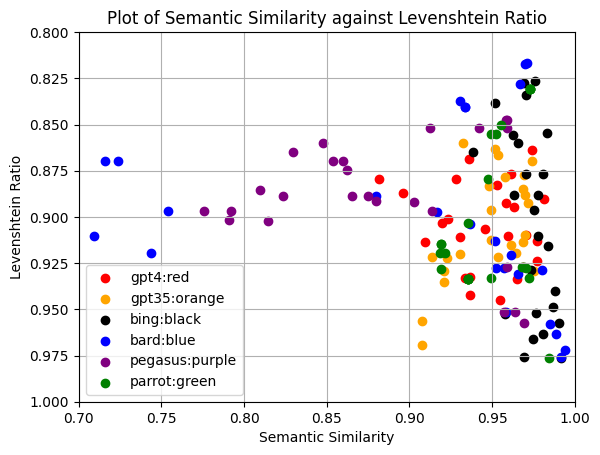

In [52]:
fig, ax = plt.subplots()

ax.scatter(gpt4_similarity, gpt4_dist, c='red', label='gpt4:red')
ax.scatter(gpt35_similarity, gpt35_dist, c='orange', label='gpt35:orange')
ax.scatter(bing_similarity, bing_dist, c='black', label='bing:black')
ax.scatter(bard_similarity, bard_dist, c='blue', label='bard:blue')
ax.scatter(pegasus_similarity, pegasus_dist, c='purple', label='pegasus:purple')
ax.scatter(parrot_similarity, parrot_dist, c='green', label='parrot:green')

plt.xlabel("Semantic Similarity")
plt.ylabel("Levenshtein Ratio")
plt.title("Plot of Semantic Similarity against Levenshtein Ratio")
ax.set_ylim(1.0, 0.8)
ax.set_xlim(0.7, 1.0)
ax.legend()
ax.grid(True)
plt.show()

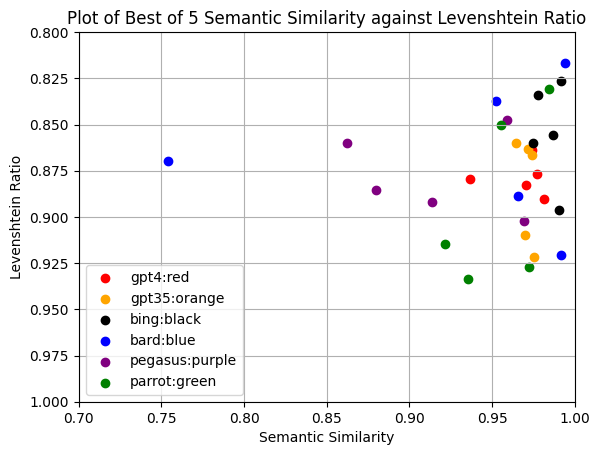

In [53]:
fig, ax = plt.subplots()

ax.scatter(gpt4_bo5_similarity, gpt4_bo5_dist, c='red', label='gpt4:red')
ax.scatter(gpt35_bo5_similarity, gpt35_bo5_dist, c='orange', label='gpt35:orange')
ax.scatter(bing_bo5_similarity, bing_bo5_dist, c='black', label='bing:black')
ax.scatter(bard_bo5_similarity, bard_bo5_dist, c='blue', label='bard:blue')
ax.scatter(pegasus_bo5_similarity, pegasus_bo5_dist, c='purple', label='pegasus:purple')
ax.scatter(parrot_bo5_similarity, parrot_bo5_dist, c='green', label='parrot:green')

plt.xlabel("Semantic Similarity")
plt.ylabel("Levenshtein Ratio")
plt.title("Plot of Best of 5 Semantic Similarity against Levenshtein Ratio")
ax.set_ylim(1.0, 0.8)
ax.set_xlim(0.7, 1.0)
ax.legend()
ax.grid(True)
plt.show()

# LLaMa v2

In [64]:
from transformers import AutoTokenizer
import transformers
import torch

In [65]:
model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

sequences = pipeline(
    'I liked "Breaking Bad" and "Band of Brothers". Do you have any recommendations of other shows I might like?\n',
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=200,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

OSError: meta-llama/Llama-2-7b-chat-hf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

### Using Huggingface interface right now, need to figure out how to huggingface-cli login

In [68]:
llama_compiled = [["Bengtsson and colleagues have calculated the L2 moments of inertia for various superdeformed bands and found that the change in the total L2 value as a function of frequency depends on which high-N orbitals are occupied.",
"In their study, Bengtsson et al. calculated the L2 moments of inertia for different superdeformed bands and discovered that the variation in the total L2 value as a function of frequency is influenced by which high-N orbitals are occupied.",
"Bengtsson and his colleagues investigated the L2 moments of inertia for various superdeformed bands and found that the change in the total L2 value as a function of frequency is linked to the occupation of specific high-N orbitals.",
"In their research, Bengtsson et al. calculated the L2 moments of inertia for several superdeformed bands and discovered that the variation in the total L2 value as a function of frequency is dependent on which high-N orbitals are filled with electrons.",
"Bengtsson and his colleagues calculated the L2 moments of inertia for various superdeformed bands and found that the change in the total L2 value as a function of frequency is related to the occupancy of specific high-N orbitals, which affects the distribution of electrons in the atom."],
["Furthermore, the frequencies of de-excitation from the superdeformed bands in 150Gd and 151Tb differ significantly from those observed in 148,149Gd and 151,152Dy.",
"It is notable that the de-excitation frequencies in 150Gd and 151Tb differ greatly from the frequencies observed in 148,149Gd and 151,152Dy.",
"The difference in de-excitation frequencies between superdeformed bands in 150Gd and 151Tb and those in 148,149Gd and 151,152Dy is quite striking.",
"The de-excitation frequencies in 150Gd and 151Tb diverge significantly from the frequencies observed in 148,149Gd and 151,152Dy, indicating distinct properties in these elements.",
"The disparity in de-excitation frequencies between superdeformed bands in 150Gd and 151Tb and those in 148,149Gd and 151,152Dy highlights the unique characteristics of each element."],
["Each transition in the band was synchronized with the other members of the group, and the spectra in Figure 1 represent the cumulative sum of spectra that correspond to transitions in the superdeformed bands of 150Gd and 151Tb, respectively.",
"The transitions were coordinated between band members, and the spectra in Figure 1 represent the total spectrum of transitions that align with the superdeformed bands of 150Gd and 151Tb.",
"Each transition was in harmony with the others in the band, and the spectra in Figure 1 demonstrate the combined spectra of transitions that correspond to the superdeformed bands of 150Gd and 151Tb.",
"The transitions were simultaneous with one another and the spectra in Figure 1 represent the collective sum of spectra associated with transitions in the superdeformed bands of 150Gd and 151Tb.",
"Each transition was in synchrony with the others, and the spectra in Figure 1 display the combined spectra of transitions that align with the superdeformed bands of 150Gd and 151Tb."],
["Despite not detecting any discrete transitions connecting the superdeformed bands to known even-electron states, it was feasible to estimate the average spin of entry into the yrast states for 150Gd through measuring the intensity of the superdeformed band detected from spectra triggered by known yrast transitions.",
"No direct connections were found between the superdeformed bands and known even-electron states, but it was possible to determine the average spin of entry into the yrast states for 150Gd by analyzing the intensity of the superdeformed band observed in spectra gated on known yrast transitions.",
"The absence of discrete transitions linking the superdeformed bands to known even-electron states did not hinder the estimation of the average spin of entry into the yrast states for 150Gd, which was achieved by measuring the intensity of the superdeformed band obtained from spectra triggered by known yrast transitions.",
"Although no obvious connections were found between the superdeformed bands and known even-electron states, it was possible to estimate the average spin of entry into the yrast states for 150Gd by analyzing the intensity of the superdeformed band observed in spectra gated on known yrast transitions.",
"Despite the lack of direct connections between the superdeformed bands and known even-electron states, it was feasible to determine the average spin of entry into the yrast states for 150Gd by measuring the intensity of the superdeformed band detected from spectra triggered by known yrast transitions."],
["On the basis of the assumption that the superdeformed band does not become yrast until its spin reaches 50 h, it is estimated that it will take around 3 MeV of excitation energy to de-excite it once it has reached the yrast state.",
"Assuming that the superdeformed band does not become yrast until its spin reaches 50 h, it is estimated that it will require around 3 MeV of excitation energy to de-excite it once it has entered the yrast state.",
"If we assume that the superdeformed band does not become yrast until its spin reaches 50 h, then it is estimated that it will take around 3 MeV of excitation energy to de-excite it once it has reached the yrast state.",
"Based on the assumption that the superdeformed band does not become yrast until its spin reaches 50 h, it is estimated that it will require around 3 MeV of excitation energy to de-excite it once it has entered the yrast state.",
"Assuming that the superdeformed band does not become yrast until its spin reaches 50 h, it is estimated that it will take around 3 MeV of excitation energy to de-excite it once it has reached the yrast state."]]

##### Lev Ratio

In [76]:
# Calculate Levenshtein distance
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in llama_compiled[i]:
        dist.append(levenshteinDistance.levenshteinDistance(sentence, sentences[i]))
    bo5_dist.append(np.max(dist))
print(bo5_dist)
print(np.mean(bo5_dist))

# Calculate Levenshtein ratio
bo5_dist = []
for i in range(5):
    dist = []
    for sentence in llama_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    bo5_dist.append(np.min(dist)) # min since we want the smallest lev ratio = furthest/best paraphrase
print(bo5_dist)
print(np.mean(bo5_dist))
llama_bo5_dist = bo5_dist

# For plotting
llama_dist = []
for i in range(5):
    dist = []
    for sentence in llama_compiled[i]:
        dist.append(ratio(sentence, sentences[i]))
    llama_dist.append(dist)
    llama_var = np.var(llama_dist)
print(llama_dist)
print(llama_var)

[23.0, 21.0, 24.0, 31.0, 30.0]
25.8
[0.9195804195804196, 0.8820224719101124, 0.8840579710144928, 0.9066265060240963, 0.8617511520737328]
0.8908077041205708
[[0.9506726457399103, 0.9539748953974896, 0.9264069264069265, 0.9484126984126984, 0.9195804195804196], [0.9695121951219512, 0.9146341463414634, 0.9024390243902439, 0.8820224719101124, 0.8895027624309392], [0.9377593360995851, 0.8840579710144928, 0.9227053140096618, 0.9033816425120773, 0.9178743961352657], [0.9066265060240963, 0.9096385542168675, 0.9066265060240963, 0.9186746987951807, 0.9066265060240963], [0.8739130434782608, 0.863849765258216, 0.8617511520737328, 0.8761061946902655, 0.863849765258216]]
0.0008417885819599208


In [75]:
llama_similarity = []
bo5_similarity = []
for i in range(5):
    similarity = []
    # We compute embeddings for the original sentence and the paraphrases
    embeddings = model.encode([sentences[i]] + llama_compiled[i])
    original_embedding = embeddings[0]
    for j in range(5):
        paraphrase_embedding = embeddings[j + 1]
        # Cosine similarity is a good measure for semantic similarity
        similarity.append(np.inner(original_embedding, paraphrase_embedding) / (np.linalg.norm(original_embedding) * np.linalg.norm(paraphrase_embedding)))
    bo5_similarity.append(np.max(similarity))
    llama_similarity.append(similarity)
print(bo5_similarity)
print(np.mean(bo5_similarity))
llama_bo5_similarity = bo5_similarity

[0.9798807, 0.9885055, 0.94474924, 0.94288623, 0.94225067]
0.9596545


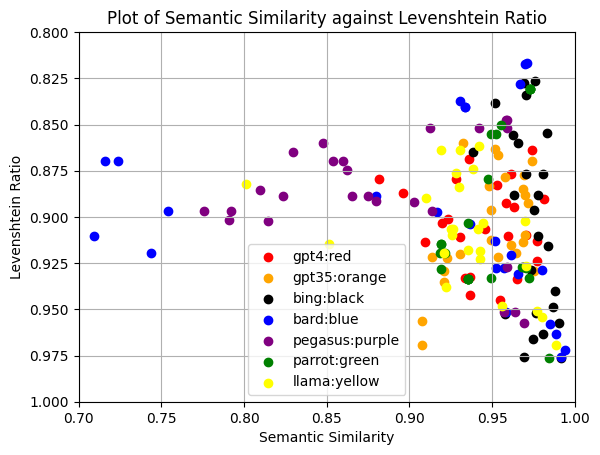

In [77]:
fig, ax = plt.subplots()

ax.scatter(gpt4_similarity, gpt4_dist, c='red', label='gpt4:red')
ax.scatter(gpt35_similarity, gpt35_dist, c='orange', label='gpt35:orange')
ax.scatter(bing_similarity, bing_dist, c='black', label='bing:black')
ax.scatter(bard_similarity, bard_dist, c='blue', label='bard:blue')
ax.scatter(pegasus_similarity, pegasus_dist, c='purple', label='pegasus:purple')
ax.scatter(parrot_similarity, parrot_dist, c='green', label='parrot:green')
ax.scatter(llama_similarity, llama_dist, c='yellow', label='llama:yellow')

plt.xlabel("Semantic Similarity")
plt.ylabel("Levenshtein Ratio")
plt.title("Plot of Semantic Similarity against Levenshtein Ratio")
ax.set_ylim(1.0, 0.8)
ax.set_xlim(0.7, 1.0)
ax.legend()
ax.grid(True)
plt.show()

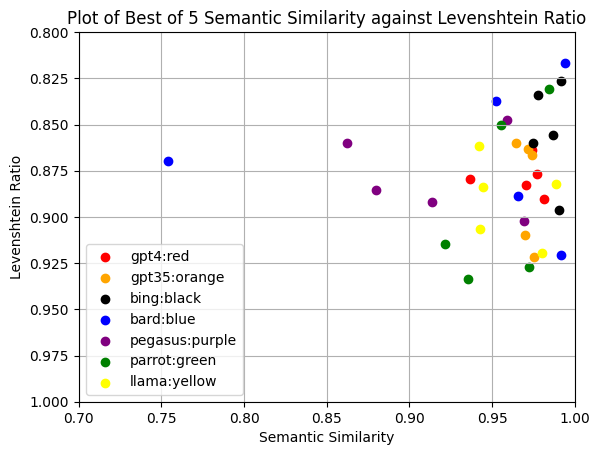

In [78]:
fig, ax = plt.subplots()

ax.scatter(gpt4_bo5_similarity, gpt4_bo5_dist, c='red', label='gpt4:red')
ax.scatter(gpt35_bo5_similarity, gpt35_bo5_dist, c='orange', label='gpt35:orange')
ax.scatter(bing_bo5_similarity, bing_bo5_dist, c='black', label='bing:black')
ax.scatter(bard_bo5_similarity, bard_bo5_dist, c='blue', label='bard:blue')
ax.scatter(pegasus_bo5_similarity, pegasus_bo5_dist, c='purple', label='pegasus:purple')
ax.scatter(parrot_bo5_similarity, parrot_bo5_dist, c='green', label='parrot:green')
ax.scatter(llama_bo5_similarity, llama_bo5_dist, c='yellow', label='llama:yellow')

plt.xlabel("Semantic Similarity")
plt.ylabel("Levenshtein Ratio")
plt.title("Plot of Best of 5 Semantic Similarity against Levenshtein Ratio")
ax.set_ylim(1.0, 0.8)
ax.set_xlim(0.7, 1.0)
ax.legend()
ax.grid(True)
plt.show()